In [18]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

np.random.seed(42)
np.set_printoptions(precision=4)

In [19]:
mat = scipy.io.loadmat('Urban.mat')
X = mat['X']

In [20]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [21]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

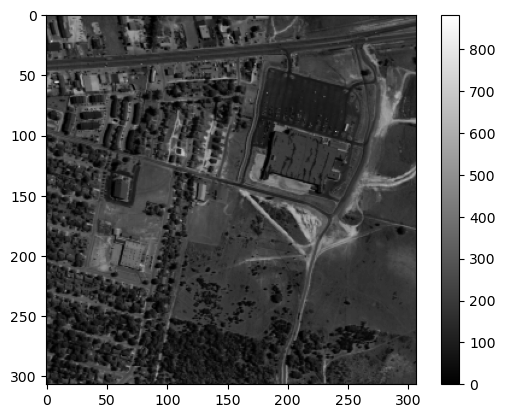

In [22]:
plt.imshow(X3d[100, :, :], cmap='gray')
plt.colorbar()

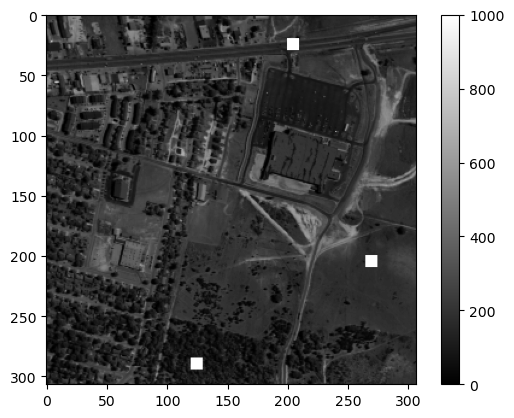

In [23]:
img = X3d[100, :, :].copy()
img[285: 295, 120: 130] = 1000 # trees
img[200: 210, 265: 275] = 1000 # grass
img[20: 30, 200: 210] = 1000 # asphalt
plt.imshow(img, cmap='gray')
plt.colorbar()

In [24]:
trees3d = X3d[:, 285: 295, 120: 130]  # (162, 10, 10)
grass3d = X3d[:, 200: 210, 265: 275]  # (162, 10, 10)
asphalt3d = X3d[:, 20: 30, 200: 210]  # (162, 10, 10)

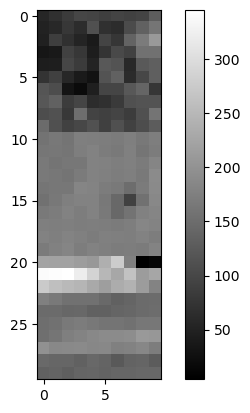

In [25]:
smallX3d = np.hstack([trees3d, grass3d, asphalt3d]) # (162, 30, 10)
plt.imshow(smallX3d[100, :, :], cmap='gray')
plt.colorbar()

In [57]:
data = np.load('mod_small_r6_it1000.npz')
fscores = data['fscores']
gscores = data['gscores']
Wl = data['Wl']
Hl = data['Hl']

In [58]:
gscores

array([890.4068, 917.1722, 885.7015, 864.564 , 847.4034, 833.9827,
       823.5249, 813.8105, 804.3093, 795.4125, 787.2079, 779.6643,
       772.7527, 766.4143, 760.5634, 755.1208, 750.0494, 745.3225,
       740.9154, 736.7964, 732.9338, 729.2929, 725.8539, 722.6023,
       719.5216, 716.5951, 713.81  , 711.1567, 708.6215, 706.1933,
       703.8673, 701.6361, 699.4944, 697.4357, 695.4512, 693.5382,
       691.6923, 689.9103, 688.1879, 686.5219, 684.9085, 683.3447,
       681.8256, 680.3499, 678.9158, 677.5197, 676.1602, 674.8344,
       673.541 , 672.279 , 671.047 , 669.8439, 668.6686, 667.5196,
       666.3959, 665.2972, 664.2189, 663.1625, 662.1271, 661.1081,
       660.1028, 659.111 , 658.1292, 657.1623, 656.2086, 655.2673,
       654.3376, 653.4182, 652.5113, 651.6174, 650.7365, 649.868 ,
       649.0117, 648.1671, 647.3335, 646.5106, 645.6973, 644.8936,
       644.0995, 643.3146, 642.5392, 641.7727, 641.0134, 640.2622,
       639.5188, 638.7832, 638.0554, 637.3351, 636.6222, 635.9

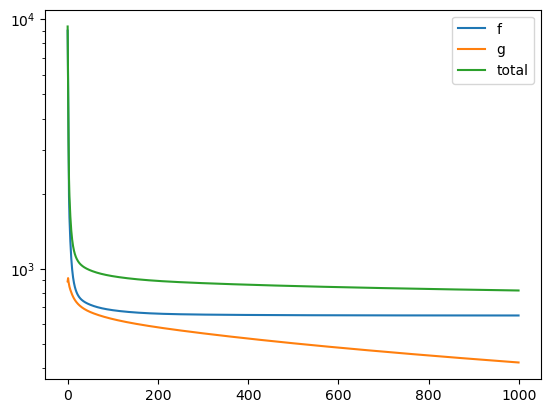

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + 0.4 * gscores)
ax.legend(['f', 'g', 'total'])

In [60]:
def normalized_similarity(W_ins):
    r = W_ins.shape[1]
    n = np.ones(shape=(r, r)) * -1
    for i in range(r):
        for j in range(r):
            n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
        n[i, :] = n[i, :] / sum(n[i, :])
    return n

In [61]:
normalized_similarity(Wl)
# 1, 4, 5, 6
# 2
# 3

array([[0.    , 0.439 , 0.0582, 0.3541, 0.0503, 0.0984],
       [0.1804, 0.    , 0.1717, 0.2524, 0.1823, 0.2133],
       [0.0554, 0.3982, 0.    , 0.3539, 0.0733, 0.1192],
       [0.1679, 0.2912, 0.1761, 0.    , 0.1813, 0.1836],
       [0.0483, 0.4259, 0.0738, 0.3671, 0.    , 0.0849],
       [0.0807, 0.4261, 0.1027, 0.318 , 0.0726, 0.    ]])

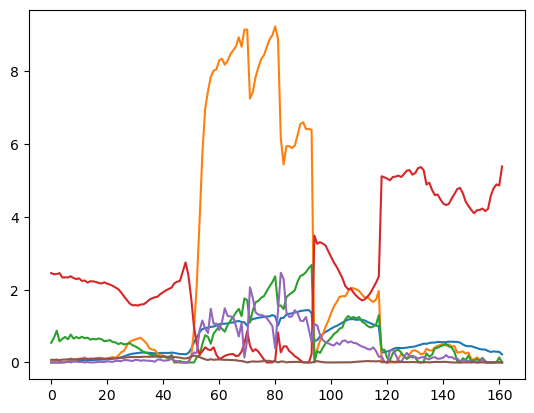

In [63]:
plt.plot(Wl)

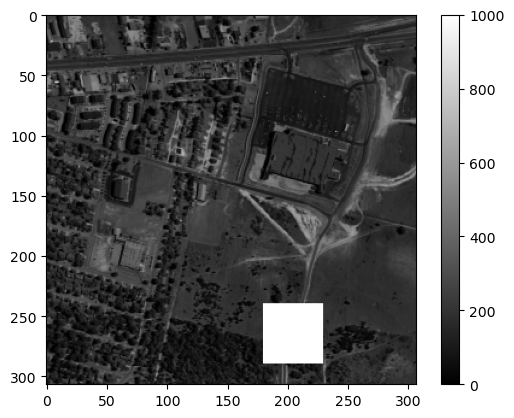

In [30]:
img = X3d[100, :, :].copy()
img[240: 290, 180: 230] = 1000
plt.imshow(img, cmap='gray')
plt.colorbar()

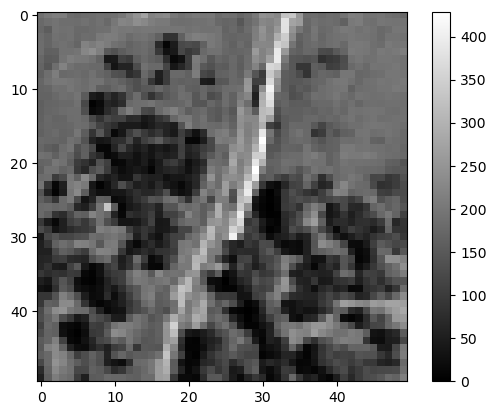

In [31]:
medX3d = X3d[:, 240: 290, 180: 230] # (162, 50, 50)
plt.imshow(medX3d[100, :, :], cmap='gray')
plt.colorbar()

In [33]:
data = np.load('urban/med_r8_it1000.npz')
fscores = data['fscores']
gscores = data['gscores']
Wl = data['Wl']
Hl = data['Hl']

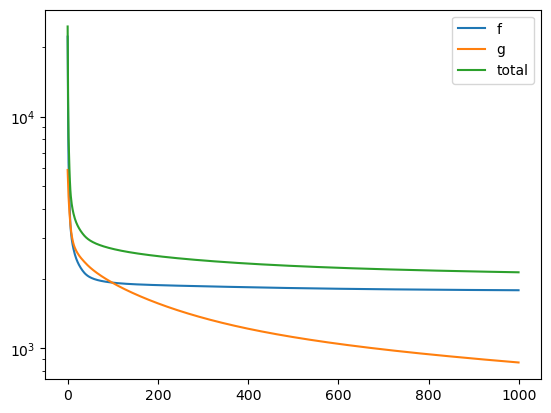

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + 0.4 * gscores)
ax.legend(['f', 'g', 'total'])

In [35]:
normalized_similarity(Wl)
# 1, 5, 7, 8 (6)
# 2
# 3
# 4
# 6

array([[0.    , 0.1765, 0.3321, 0.1993, 0.0301, 0.1415, 0.05  , 0.0705],
       [0.1187, 0.    , 0.2365, 0.1708, 0.1183, 0.126 , 0.1224, 0.1074],
       [0.1424, 0.1508, 0.    , 0.1765, 0.1476, 0.1036, 0.148 , 0.1311],
       [0.1107, 0.141 , 0.2286, 0.    , 0.1041, 0.1514, 0.1307, 0.1334],
       [0.0287, 0.1679, 0.3287, 0.179 , 0.    , 0.1479, 0.0606, 0.087 ],
       [0.1121, 0.1484, 0.1913, 0.216 , 0.1227, 0.    , 0.1116, 0.0979],
       [0.0453, 0.1649, 0.3127, 0.2133, 0.0576, 0.1277, 0.    , 0.0785],
       [0.0654, 0.1482, 0.2837, 0.2229, 0.0846, 0.1147, 0.0804, 0.    ]])

In [39]:
data = np.load('urban/full_r16_it500.npz')
fscores = data['fscores']
gscores = data['gscores']
Wl = data['Wl']
Hl = data['Hl']

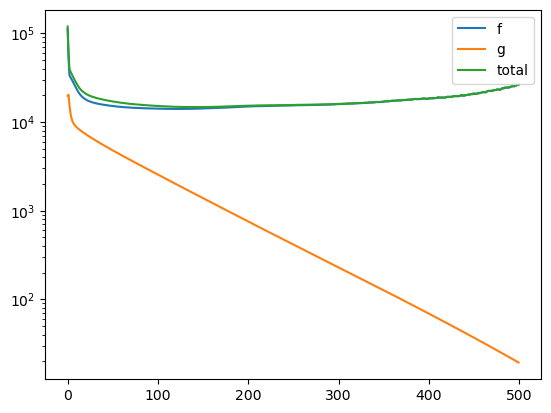

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + 0.4 * gscores)
ax.legend(['f', 'g', 'total'])

In [42]:
for row in normalized_similarity(Wl):
    print(row)

[0.     0.0156 0.119  0.0989 0.0981 0.1122 0.4846 0.0034 0.0039 0.0039
 0.004  0.0039 0.0039 0.0409 0.004  0.0038]
[0.0142 0.     0.1068 0.0914 0.0781 0.0967 0.4415 0.0161 0.0166 0.0165
 0.0166 0.0166 0.0166 0.0393 0.0166 0.0165]
[0.0567 0.0559 0.     0.0449 0.0587 0.0797 0.1931 0.058  0.0581 0.0581
 0.0581 0.0581 0.0582 0.046  0.0582 0.0581]
[0.0535 0.0542 0.0509 0.     0.0748 0.0795 0.2136 0.0547 0.0548 0.0548
 0.0549 0.0548 0.0548 0.035  0.0549 0.0548]
[0.0493 0.0431 0.0618 0.0696 0.     0.0748 0.2448 0.0503 0.0505 0.0505
 0.0506 0.0505 0.0505 0.0525 0.0505 0.0505]
[0.051  0.0482 0.0761 0.0669 0.0678 0.     0.2239 0.0515 0.0517 0.0517
 0.0517 0.0517 0.0516 0.053  0.0517 0.0516]
[0.0683 0.0683 0.0571 0.0557 0.0687 0.0694 0.     0.0687 0.0687 0.0687
 0.0687 0.0687 0.0687 0.063  0.0687 0.0687]
[0.0034 0.0178 0.1224 0.1018 0.1008 0.1139 0.4902 0.     0.0008 0.0008
 0.0009 0.0008 0.0008 0.0436 0.0009 0.0008]
[3.9354e-03 1.8282e-02 1.2275e-01 1.0212e-01 1.0124e-01 1.1427e-01
 4.9052e-01 8

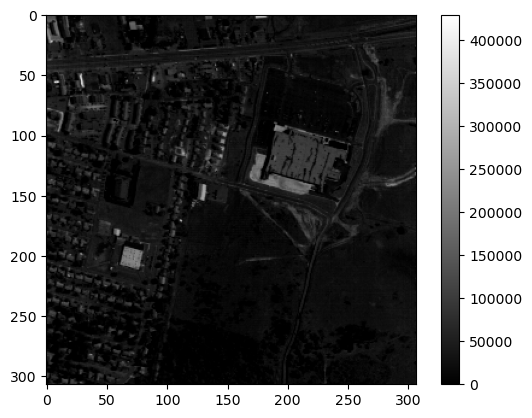

In [47]:
plt.imshow(Hl[15, :].reshape(307, 307, order='F'), cmap='gray')
plt.colorbar()

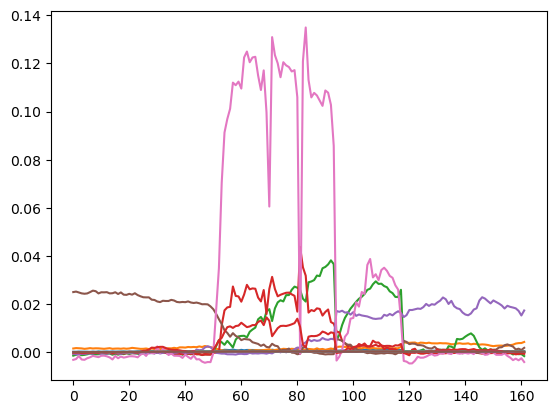

In [48]:
plt.plot(Wl)


In [49]:
Wl < 0

array([[False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ...,  True, False, False]])